In [19]:
import sys
sys.path.append("..")
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

import numpy as np
from scipy import stats
from IPython.display import Image, display

import corner

import datetime
import random

import copy

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm
from matplotlib import rcParams

import datetime
%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))
%config InlineBackend.figure_format = 'retina'


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
machine = 'mac'
#machine = 'magny'
machine = 'virgo'

if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
   

In [3]:
# load potential params
snapnum_all = []
R0_kpc_all =[]
v0_kms_all =[]
a_MND_kpc_all =[]
b_MND_kpc_all =[]
a_HB_kpc_all =[]
a_NFWH_kpc_all =[]
v0_MND_kms_all =[]
v0_HB_kms_all =[]
v0_NFWH_kms_all =[]
for i in range (60,128,1):
    snapnum, R0_kpc, v0_kms, a_MND_kpc, b_MND_kpc, a_HB_kpc, a_NFWH_kpc, v0_MND_kms, v0_HB_kms, v0_NFWH_kms = np.loadtxt(filedir + 'potential/potential_params_dec18/pot_snap_{}'.format(i))
    snapnum_all.append(snapnum) 
    R0_kpc_all.append(R0_kpc)
    v0_kms_all.append(v0_kms)
    a_MND_kpc_all.append(a_MND_kpc)
    b_MND_kpc_all.append(b_MND_kpc)
    a_HB_kpc_all.append(a_HB_kpc)
    a_NFWH_kpc_all.append(a_NFWH_kpc)
    v0_MND_kms_all.append(v0_MND_kms)
    v0_HB_kms_all.append(v0_HB_kms)
    v0_NFWH_kms_all.append(v0_NFWH_kms)

In [4]:
# load another file which includes lookback time
age = np.loadtxt(filedir + 'auriga/survivor_overview_all_snapshots.txt',usecols = 1, skiprows=2)

In [5]:
age[-68:]

array([  1.06909715e+01,   1.05349527e+01,   1.03716028e+01,
         1.02255404e+01,   1.00737067e+01,   9.91592280e+00,
         9.77976235e+00,   9.61060763e+00,   9.46472439e+00,
         9.31426071e+00,   9.15911830e+00,   8.99920106e+00,
         8.83441554e+00,   8.69902116e+00,   8.52524756e+00,
         8.38255210e+00,   8.23654439e+00,   8.08718578e+00,
         7.89572002e+00,   7.73869226e+00,   7.61865213e+00,
         7.45555002e+00,   7.28894016e+00,   7.11879963e+00,
         6.98886522e+00,   6.81250048e+00,   6.67788022e+00,
         6.49524898e+00,   6.35591826e+00,   6.16699749e+00,
         6.02294656e+00,   5.87687351e+00,   5.72878063e+00,
         5.52818783e+00,   5.37539802e+00,   5.22060516e+00,
         5.06381703e+00,   4.90504268e+00,   4.74429244e+00,
         4.58157788e+00,   4.41691180e+00,   4.25030822e+00,
         4.08178238e+00,   3.96837194e+00,   3.79667933e+00,
         3.62311070e+00,   3.44768544e+00,   3.27042396e+00,
         3.15124008e+00,

In [6]:
ndim = 9
labels = ["R$_{0}$ [kpc]","v$_0$ [km s$^{-1}$]","a$_{\mathrm{MND}}$ [kpc]","b$_{\mathrm{MND}}$ [kpc]","a$_{\mathrm{NFWH}}$ [kpc]","a$_{\mathrm{HB}}$ [kpc]","v$_{0, \mathrm{MND}}$ [km s$^{-1}$]","v$_{0, \mathrm{NFWH}}$ [km s$^{-1}$]","v$_{0, \mathrm{HB}}$ [km s$^{-1}$]"]

params = np.vstack([R0_kpc_all, v0_kms_all,a_MND_kpc_all, b_MND_kpc_all, a_NFWH_kpc_all, a_HB_kpc_all, v0_MND_kms_all, v0_NFWH_kms_all, v0_HB_kms_all])


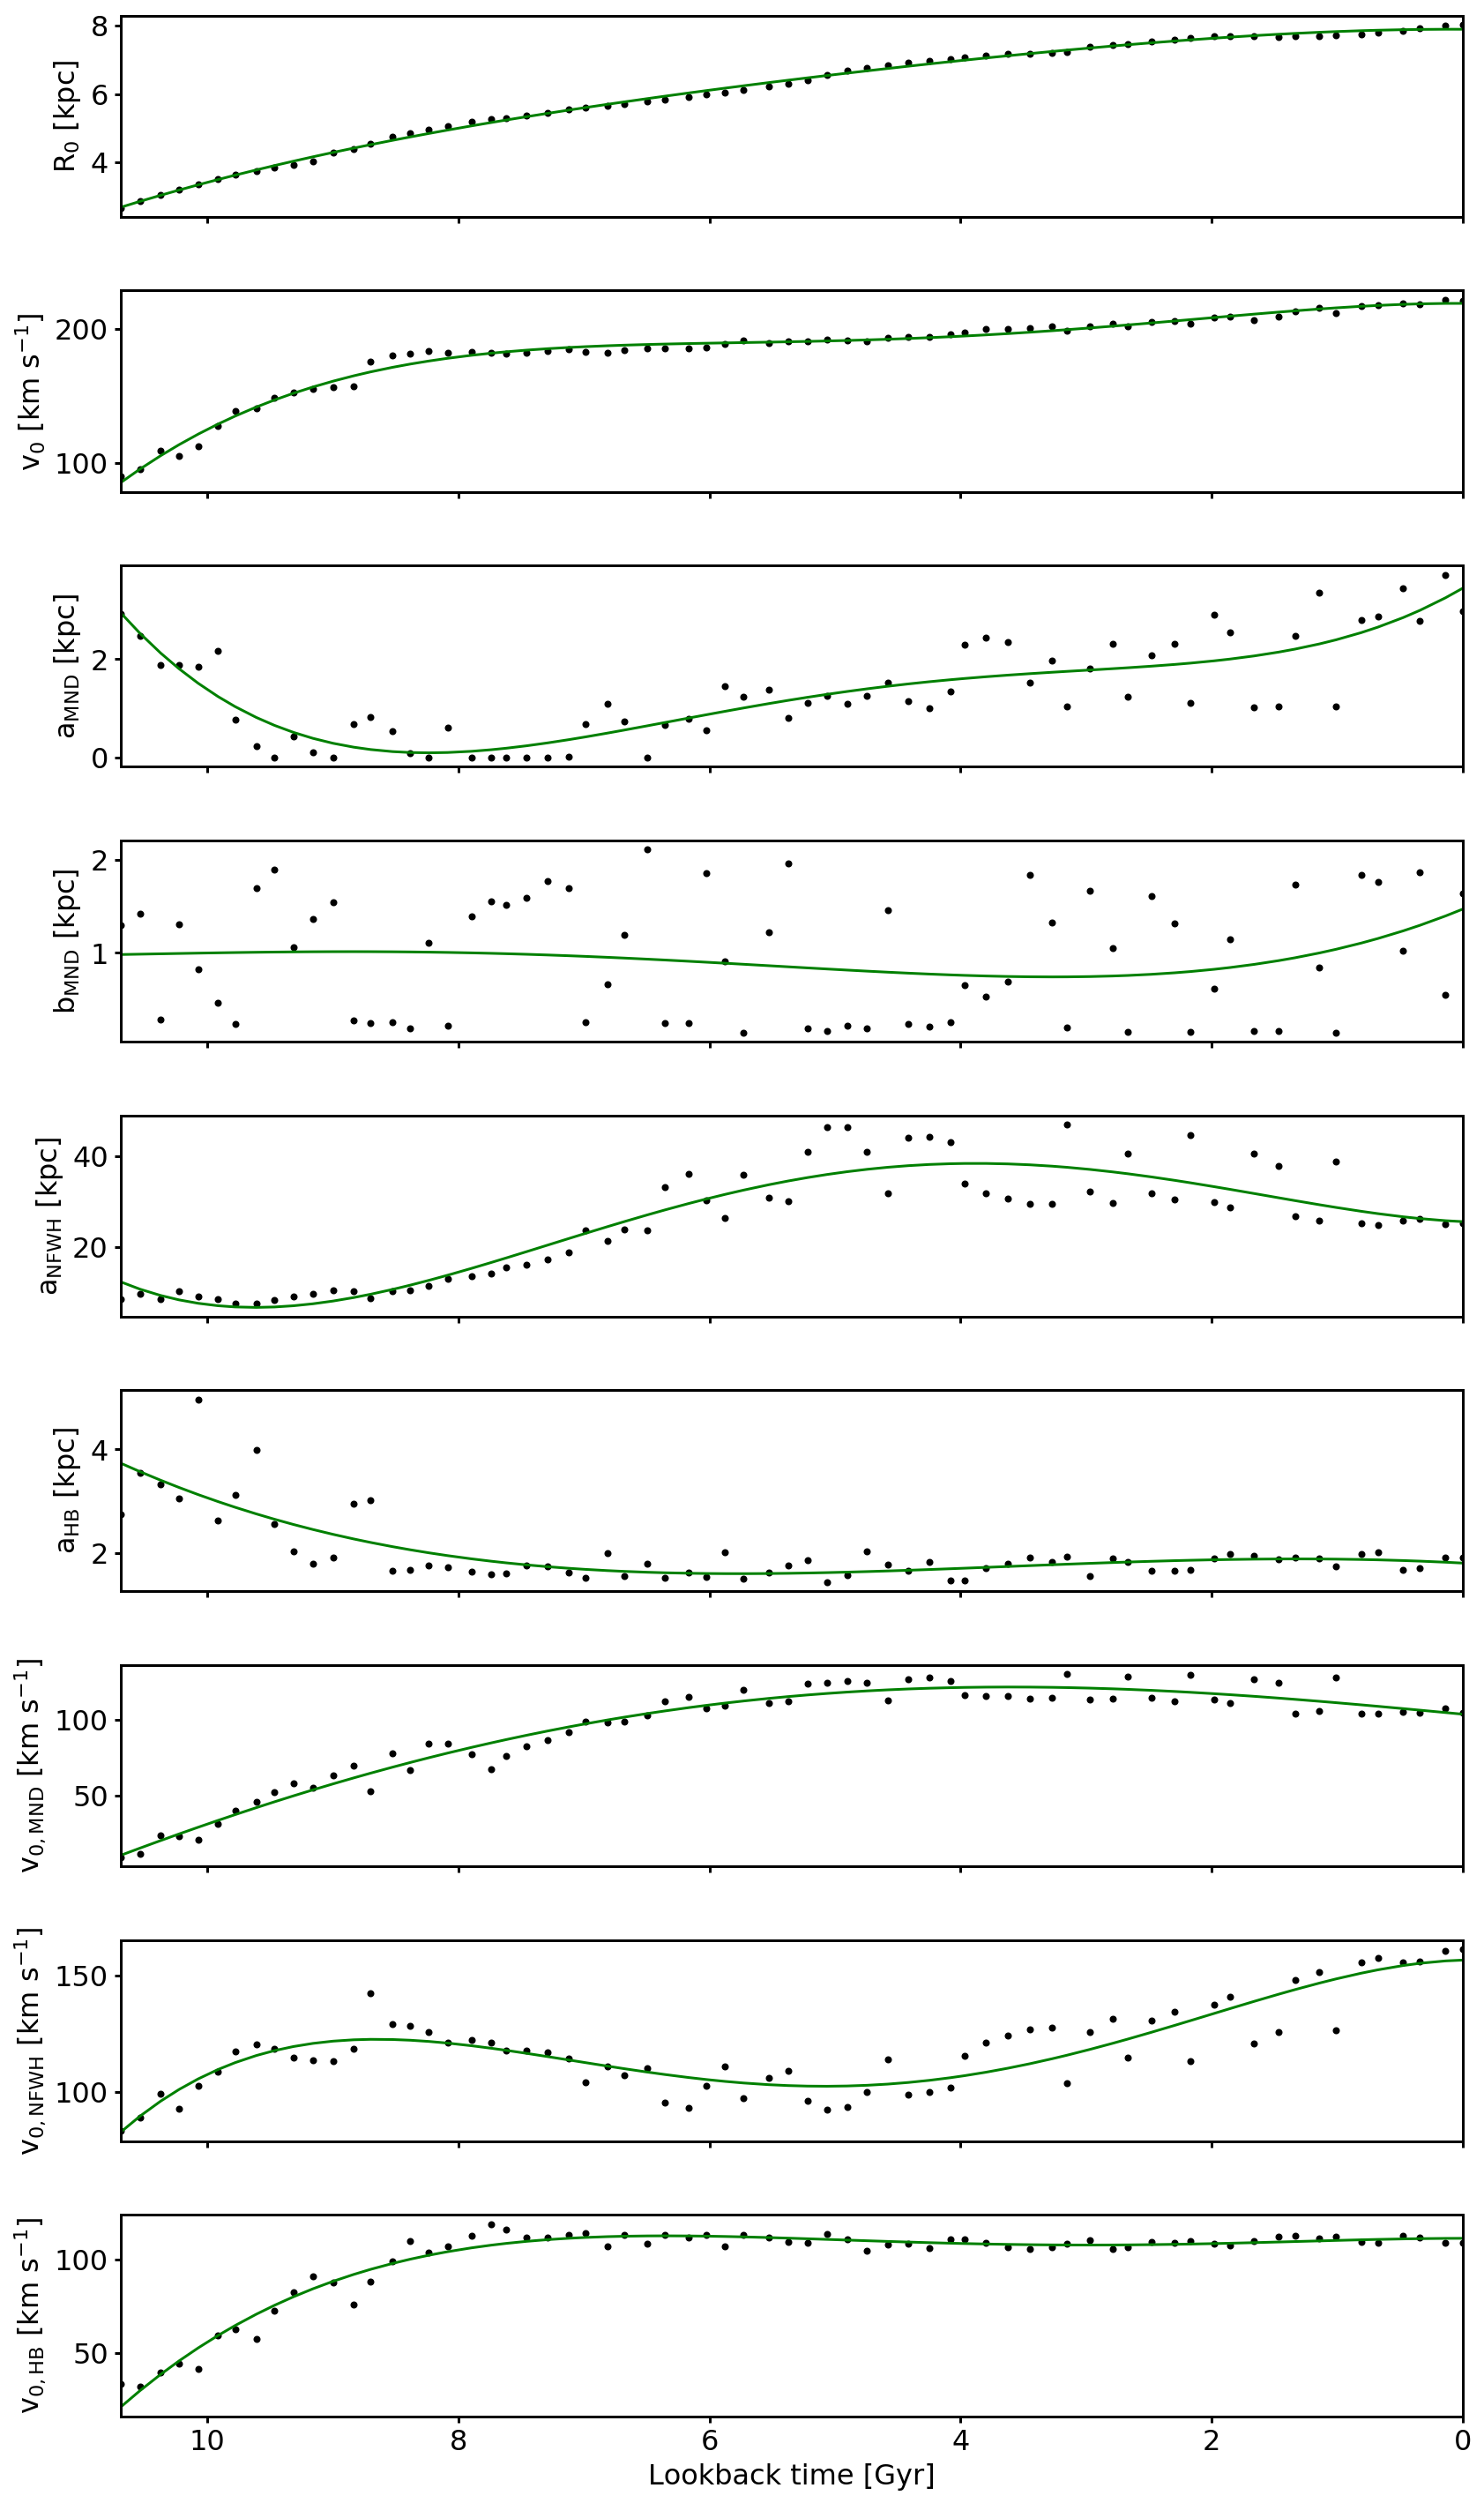

In [20]:
jj = 4 # looked best
f, axes = plt.subplots(ndim, 1, figsize=(12,20), sharex=True)
fitted_params = []
for ii in range(ndim):
    axes[ii].set_ylabel(labels[ii])
    if ii == (ndim - 1):
        axes[ii].set_xlabel('Lookback time [Gyr]')
    #axes[ii,1].set_yscale('log', nonposy="clip")
    #p = np.poly1d(zz[0])
    x = np.arange(60,128,1)
    x = age[-len(x):]
    y = params[ii]
    axes[ii].plot(x,y, 'k.')
    zz = np.polyfit(x, y, jj, full = True)
    #axes[ii].set_xlim(axes[ii].get_xlim()
    #axes[ii].legend()
    p = np.poly1d(zz[0])
    xp = x
    axes[ii].plot(xp, p(xp), 'g-', label = str(jj + 1) + ' polynoms')
    
    fitted_params.append(p(xp))

axes[ii].set_xlim(np.max(age[-len(x):]), np.min(age[-len(x):]))
f.tight_layout()
plt.show()

In [18]:
f.savefig(plotdir+'potential/fitted_potential_evolution_dec18.png', format = 'png', dpi = 300, bbox_to_inches = 'tight')

In [9]:
np.savetxt(filedir + 'potential/fitted_potential_params_dec18.txt', fitted_params)#, fmt = formt

In [10]:
#to load fitted potential parameters:
#v0_kms_all,a_MND_kpc_all, b_MND_kpc_all, a_NFWH_kpc_all, a_HB_kpc_all, v0_MND_kms_all, v0_NFWH_kms_all, v0_HB_kms_all = np.loadtxt(filedir + 'potential/fitted_potential_params_dec18.txt')